In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../../prepared_data/missing_value_imputed.csv')

In [4]:
df.shape

(3753, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip monsella,sector 53,7.40,33199.0,4,4,3,21.0,Under Construction,2477.0,0,0,0,0,0,0,35
1,flat,godrej nature plus,sector 33,1.50,9677.0,3,3,3,6.0,Under Construction,1403.0,1,0,0,0,0,0,72
2,flat,godrej nature plus,sector 33,1.15,11558.0,2,2,2,15.0,Under Construction,103.0,0,0,0,0,0,0,38
3,house,independent,sector 3,3.50,9210.0,1,1,0,1.0,Moderately Old,3800.0,0,0,0,0,0,0,0
4,flat,paras dews,sector 106,1.15,6534.0,3,4,4,12.0,Relatively New,1186.0,1,1,0,0,0,1,174


In [6]:
!pip install nbformat plotly

In [7]:
import plotly.io as pio
pio.renderers.default = "vscode"
import plotly.graph_objs as go 

# create traces for each sector 
traces = []
for sector in df['sector'].unique():
    sector_data = df[df['sector']==sector]
    trace = go.Scatter(
        x = sector_data['luxury_score'],
        y = sector_data['price'],
        mode = 'markers',
        name = f'Sector {sector}',
        marker = dict(size=10),
        text=[f'Sector: {sector}, Society: {society}' for society in sector_data['society']]
    )
    traces.append(trace)

# Create the Layout
layout = go.Layout(
    title='Scatter Plot price vs luxury score',
    xaxis = dict(title='luxury_score'),
    yaxis = dict(title='price'),
    showlegend=True
)
# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 70a,1.69,3,3,4,8.0,New Property,1900.0,0,1,0,0,0,0,165
1,flat,sector 83,1.08,3,3,3,6.0,Relatively New,1537.0,0,0,1,0,0,0,111
2,flat,sector 104,1.30,3,3,3,8.0,New Property,1490.0,0,0,0,0,1,0,103
3,house,sector 11,0.44,3,2,1,1.0,Relatively New,128.0,0,0,0,1,1,0,46
4,flat,sector 92,1.30,4,4,0,7.0,Relatively New,2040.0,0,0,0,0,0,0,0


### luxury score

<Axes: ylabel='luxury_score'>

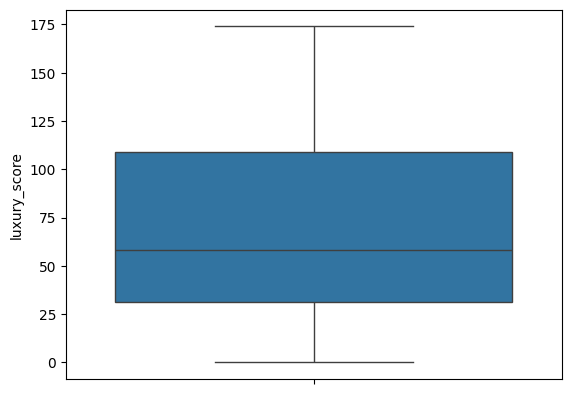

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 70a,1.69,3,3,4,8.0,New Property,1900.0,0,1,0,0,0,0,165,High
1,flat,sector 83,1.08,3,3,3,6.0,Relatively New,1537.0,0,0,1,0,0,0,111,Medium
2,flat,sector 104,1.30,3,3,3,8.0,New Property,1490.0,0,0,0,0,1,0,103,Medium
3,house,sector 11,0.44,3,2,1,1.0,Relatively New,128.0,0,0,0,1,1,0,46,Low
4,flat,sector 92,1.30,4,4,0,7.0,Relatively New,2040.0,0,0,0,0,0,0,0,Low


### floorNum

<Axes: ylabel='floorNum'>

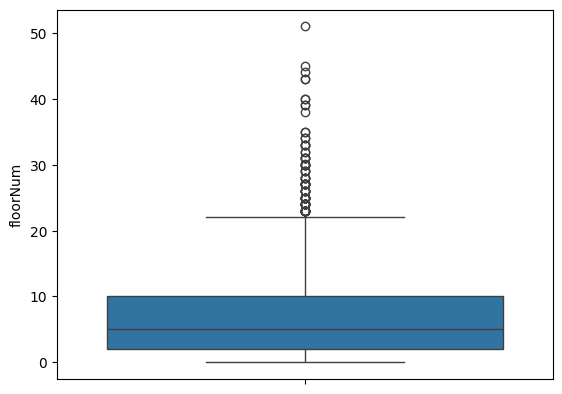

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 60:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 70a,1.69,3,3,4,8.0,New Property,1900.0,0,1,0,0,0,0,165,High,Mid Floor
1,flat,sector 83,1.08,3,3,3,6.0,Relatively New,1537.0,0,0,1,0,0,0,111,Medium,Mid Floor
2,flat,sector 104,1.30,3,3,3,8.0,New Property,1490.0,0,0,0,0,1,0,103,Medium,Mid Floor
3,house,sector 11,0.44,3,2,1,1.0,Relatively New,128.0,0,0,0,1,1,0,46,Low,Low Floor
4,flat,sector 92,1.30,4,4,0,7.0,Relatively New,2040.0,0,0,0,0,0,0,0,Low,Mid Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 70a,1.69,3,3,4,New Property,1900.0,0,1,0,0,0,0,High,Mid Floor
1,flat,sector 83,1.08,3,3,3,Relatively New,1537.0,0,0,1,0,0,0,Medium,Mid Floor
2,flat,sector 104,1.30,3,3,3,New Property,1490.0,0,0,0,0,1,0,Medium,Mid Floor
3,house,sector 11,0.44,3,2,1,Relatively New,128.0,0,0,0,1,1,0,Low,Low Floor
4,flat,sector 92,1.30,4,4,0,Relatively New,2040.0,0,0,0,0,0,0,Low,Mid Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,83.0,3,3,4,1.0,1900.0,0,1,0,0,0,0,0.0,2.0
1,0.0,97.0,3,3,3,3.0,1537.0,0,0,1,0,0,0,2.0,2.0
2,0.0,8.0,3,3,3,1.0,1490.0,0,0,0,0,1,0,2.0,2.0
3,1.0,15.0,3,2,1,3.0,128.0,0,0,0,1,1,0,1.0,1.0
4,0.0,107.0,4,4,0,3.0,2040.0,0,0,0,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,0.0,46.0,3,3,4,0.0,1602.0,0,0,0,0,0,0,1.0,0.0
3749,0.0,107.0,3,3,4,3.0,1523.0,0,0,0,0,0,0,1.0,0.0
3750,0.0,105.0,4,4,4,3.0,2005.0,0,0,0,0,0,2,1.0,2.0
3751,0.0,100.0,2,2,1,1.0,557.0,0,0,0,0,1,0,2.0,2.0


In [20]:
y_label

0       1.69
1       1.08
2       1.30
3       0.44
4       1.30
        ... 
3748    1.00
3749    0.82
3750    2.05
3751    0.43
3752    1.55
Name: price, Length: 3753, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

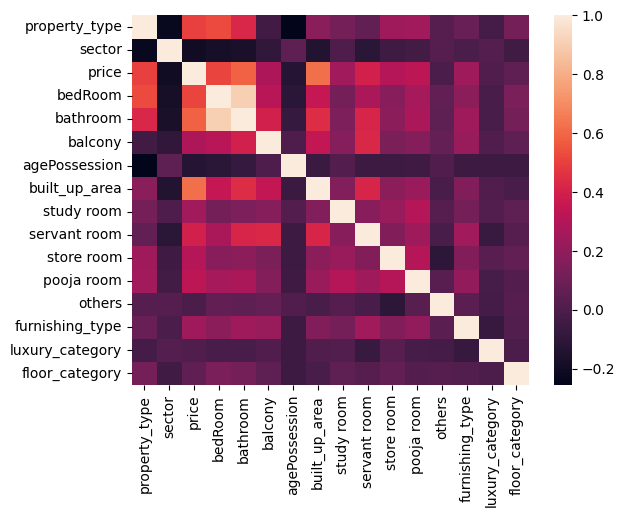

In [21]:
 sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.197786
1,price,1.000000
2,bedRoom,0.513618
3,bathroom,0.583532
4,balcony,0.282598
5,agePossession,-0.130770
6,built_up_area,0.622219
7,study room,0.244944
8,servant room,0.401498
9,store room,0.303785


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.538070
1,sector,0.107850
0,property_type,0.094379
3,bathroom,0.082320
2,bedRoom,0.054035
8,servant room,0.039841
5,agePossession,0.015312
7,study room,0.014540
4,balcony,0.014382
12,furnishing_type,0.009510


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.541498
1,sector,0.119724
0,property_type,0.110098
3,bathroom,0.107949
8,servant room,0.054139
2,bedRoom,0.042764
7,study room,0.009479
9,store room,0.003684
5,agePossession,0.003196
4,balcony,0.002662


### Technique 3 - Gradient Boosting Feature importances

### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.498631
0,property_type,0.166743
1,sector,0.119258
3,bathroom,0.107814
2,bedRoom,0.042064
8,servant room,0.038314
4,balcony,0.008216
7,study room,0.007558
5,agePossession,0.004373
10,pooja room,0.003646


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.119162
0,property_type,0.891602
3,bathroom,0.870566
8,servant room,0.205936
9,store room,0.193265
7,study room,0.189349
12,furnishing_type,0.152799
10,pooja room,0.105730
13,luxury_category,0.051825
4,balcony,0.000772


### Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.540515
1,sector,0.105516
0,property_type,0.095877
3,bathroom,0.080529
2,bedRoom,0.056432
8,servant room,0.039920
4,balcony,0.015524
5,agePossession,0.014828
7,study room,0.011502
12,furnishing_type,0.010060


### Technique 7 - Linear Regression Weights

In [29]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.114833
3,bathroom,0.983713
0,property_type,0.918542
8,servant room,0.196843
7,study room,0.194533
9,store room,0.194481
12,furnishing_type,0.157891
10,pooja room,0.110478
13,luxury_category,0.061889
4,balcony,0.009952


### Technique 8 - SHAP

In [30]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/40/6c/850cdf7d0c6351ee9d060c0a24237381ae212c125553afa61198eaa06b0b/shap-0.45.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/79/89/2d924ca60dbf949f18a6fec223a2445f5f428d9a5f97a6b29c2122319015/numba-0.60.0-cp311-cp311-win_amd64.whl.metadata
  Using cached numba-0.60.0-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b914f0a/cloudpickle-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for llvmlite<0.44,>=0.43.0dev0 from https://files.pythonhosted.org/package


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import shap
from .autonotebook import tqdm as notebook_tqdm

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


d:\datascience\Real_Estate\menv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-0.25633599, -0.09348721, -0.06684848, ..., -0.02581878,
         0.06948178, -0.03610267],
       [-0.19886964, -0.41832563, -0.06810969, ..., -0.01639216,
        -0.00260018, -0.00527987],
       [-0.20965001, -0.18851505, -0.06512276, ..., -0.00461341,
        -0.00281284, -0.01516563],
       ...,
       [-0.37040857, -0.55845437,  0.20690267, ...,  0.05310988,
         0.01043239, -0.00975506],
       [-0.10905219, -0.26113524, -0.23268835, ..., -0.00447862,
        -0.00456981, -0.00667971],
       [-0.29826027,  0.15606295, -0.10781577, ..., -0.00967776,
        -0.05128689, -0.06768315]])

In [33]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,0.870261
0,property_type,0.409182
1,sector,0.395428
3,bathroom,0.394290
2,bedRoom,0.192526
8,servant room,0.185782
7,study room,0.037424
4,balcony,0.033841
5,agePossession,0.028965
14,floor_category,0.025975


In [34]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [35]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.197786,0.107850,0.120286,0.119258,-0.069854,0.105516,-0.077810,0.395428
bedRoom,0.513618,0.054035,0.042599,0.042064,-0.364589,0.056432,-0.493098,0.192526
bathroom,0.583532,0.082320,0.107971,0.107814,0.870566,0.080529,0.983713,0.394290
balcony,0.282598,0.014382,0.002628,0.008216,0.000772,0.015524,0.009952,0.033841
agePossession,-0.130770,0.015312,0.003188,0.004373,-0.000000,0.014828,-0.008033,0.028965
built_up_area,0.622219,0.538070,0.541373,0.498631,1.119162,0.540515,1.114833,0.870261
study room,0.244944,0.014540,0.009383,0.007558,0.189349,0.011502,0.194533,0.037424
servant room,0.401498,0.039841,0.054094,0.038314,0.205936,0.039920,0.196843,0.185782
store room,0.303785,0.006041,0.003684,0.000534,0.193265,0.006810,0.194481,0.017690


In [36]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [37]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.557310
sector             0.138090
bathroom           0.121312
bedRoom            0.061265
servant room       0.055560
study room         0.013018
balcony            0.012192
agePossession      0.011013
furnishing_type    0.007101
luxury_category    0.005594
store room         0.005376
floor_category     0.005232
pooja room         0.004214
others             0.002723
dtype: float64

In [38]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,83.0,3,3,4,1.0,1900.0,0,1,0,0,0,0,0.0,2.0
1,0.0,97.0,3,3,3,3.0,1537.0,0,0,1,0,0,0,2.0,2.0
2,0.0,8.0,3,3,3,1.0,1490.0,0,0,0,0,1,0,2.0,2.0
3,1.0,15.0,3,2,1,3.0,128.0,0,0,0,1,1,0,1.0,1.0
4,0.0,107.0,4,4,0,3.0,2040.0,0,0,0,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,0.0,46.0,3,3,4,0.0,1602.0,0,0,0,0,0,0,1.0,0.0
3749,0.0,107.0,3,3,4,3.0,1523.0,0,0,0,0,0,0,1.0,0.0
3750,0.0,105.0,4,4,4,3.0,2005.0,0,0,0,0,0,2,1.0,2.0
3751,0.0,100.0,2,2,1,1.0,557.0,0,0,0,0,1,0,2.0,2.0


In [39]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [40]:
scores.mean()

0.7802730933439759

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

0.7741041979000862

In [45]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [280]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [348]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0,90,2.0,2.0,1,3,532.0,0.0,0.0,0.0,2,2,0.37
3550,1,12,5.0,5.0,4,3,6228.0,1.0,1.0,0.0,0,1,6.00
3551,0,23,1.0,1.0,1,0,665.0,0.0,0.0,1.0,2,2,0.60
3552,1,44,5.0,6.0,3,0,5490.0,1.0,1.0,0.0,2,2,15.50
